## Introducción a la ciencia de las redes: _Actividad entregable 4_

#### _Briones Andrade Joshua_


In [40]:
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

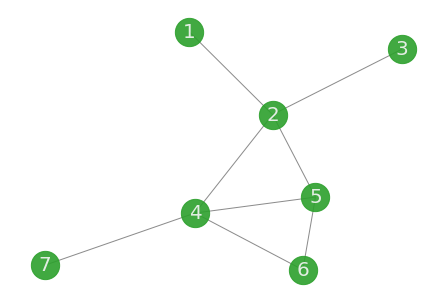

In [177]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(2,4),(2,5),(4,5),(4,6),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3000, threshold=0.00001, seed=36129312) 
nx.draw(G, pos, with_labels=True, **options)

In [178]:
def grado_prom(G):             # Grado promedio
    N = len(G); k = 0
    for i in range(1, N +1):
        k += G.degree[i]
    return k/N
# --------------------------------------------------
def clustering_prom(G):        # Clustering coeff
    N = len(G); k = 0
    for i in range(1, N+1):
        k += nx.clustering(G, i)
    return k/N
# --------------------------------------------------
def betweenness_prom(G):       # Betweenness
    N = len(G); s = 0
    B_dict = nx.betweenness_centrality(G, k=N, normalized=False)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def shortest_path_length_prom(G): # Camino más corto
    N = len(G); s = 0
    p = dict(nx.shortest_path_length(G))
    for i in p:
        for j in p[i]:
            s += p[i][j]
    return s/(N*(N-1))
# --------------------------------------------------
def closeness_prom(G):         # Closeness
    N = len(G); s = 0
    p = nx.closeness_centrality(G)
    for key in p:
        s += p[key]
    return s/N
# ---------------------------------------------------
def eccentricity_prom(G):      # Excentricidad
    N = len(G); s = 0
    p = nx.eccentricity(G, v=None)
    for key in p:
        s += p[key]
    return s/N

In [179]:
print("----------- Grado [k] ------------\n")
print("Promedio:", grado_prom(G), "\n")
print("----- Clustering coefficient -----\n")
print("Promedio:", clustering_prom(G))
print("Nodo 5:  ", nx.clustering(G, 5), "\n")
print("----- Betweenness centrality -----","\n")
print("Promedio:", betweenness_prom(G))
print("Nodo 2:  ", nx.betweenness_centrality(G, k=7, normalized=False)[2], "\n")
print("------ Shortest path length ------","\n")
print("Promedio:", shortest_path_length_prom(G))
print("3 -> 7:  ", nx.shortest_path_length(G, source=3, target=7), "\n")
print("------ Closeness centrality ------","\n")
print("Promedio:", closeness_prom(G))
print("Nodo 5:  ", nx.closeness_centrality(G, u=5), "\n")
print("---------- Eccentricity ----------\n")
print("Promedio:", eccentricity_prom(G), "\n")
# print("Nodo 4:  ", nx.nx.eccentricity(G, v=4))
print("------- Diámetro de la red -------\n")
print("Diámetro:", nx.diameter(G))

----------- Grado [k] ------------

Promedio: 2.2857142857142856 

----- Clustering coefficient -----

Promedio: 0.3095238095238095
Nodo 5:   0.6666666666666666 

----- Betweenness centrality ----- 

Promedio: 2.4285714285714284
Nodo 2:   9.0 

------ Shortest path length ------ 

Promedio: 1.8095238095238095
3 -> 7:   3 

------ Closeness centrality ------ 

Promedio: 0.5787545787545787
Nodo 5:   0.6666666666666666 

---------- Eccentricity ----------

Promedio: 2.5714285714285716 

------- Diámetro de la red -------

Diámetro: 3


In [5]:
def eigenvalue_prom(G):             # Centralidad de eigenvector
    N = len(G); s = 0
    B_dict = nx.eigenvector_centrality(G)
    for key in B_dict:
        s += B_dict[key]
    return s/N
# --------------------------------------------------
def katz_prom(G, alpha=0.1, beta=1.0): # Camino más corto
    N = len(G); s = 0
    p = nx.katz_centrality_numpy(G, alpha=alpha, beta=beta, normalized=False)
    for key in p:
        s += p[key]
    return s/N
# --------------------------------------------------

phi = np.abs(np.max(nx.adjacency_spectrum(G)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
print("----------- Centralidad de eigenvector ------------\n")
print("Promedio:", eigenvalue_prom(G))
print("Nodo 4:  ", nx.eigenvector_centrality(G)[4], "\n")
print("----- Centralidad de Katz (alpha=lambda, beta=1) -----\n")
print("Promedio:", katz_prom(G, alpha=phi, beta=1.0))
print("Nodo 4:  ", nx.katz_centrality_numpy(G, alpha=phi, beta=1, normalized=False)[4], "\n")
print("----- Centralidad de Katz -----\n")
print("Promedio:", katz_prom(G, alpha=0.1, beta=0.5), "  (alpha=0.1, beta=0.5)")
print("Promedio:", katz_prom(G, alpha=0.1, beta=1.0), "  (alpha=0.1, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.1, beta=2.0), "  (alpha=0.1, beta=2.0)")
print("Promedio:", katz_prom(G, alpha=0.01, beta=1.0), " (alpha=0.01, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.2, beta=1.0), "  (alpha=0.2, beta=1.0)")
print("Promedio:", katz_prom(G, alpha=0.5, beta=1.0), "(alpha=0.5, beta=1.0)\n")

----------- Centralidad de eigenvector ------------

Promedio: 0.3455373638789206
Nodo 4:   0.5416128697886126 

----- Centralidad de Katz (alpha=lambda, beta=1) -----

Promedio: 0.13183823549690826
Nodo 4:   0.6867220905721306 

----- Centralidad de Katz -----

Promedio: 0.661761017536896   (alpha=0.1, beta=0.5)
Promedio: 1.323522035073792   (alpha=0.1, beta=1.0)
Promedio: 2.647044070147584   (alpha=0.1, beta=2.0)
Promedio: 1.0235622699299902  (alpha=0.01, beta=1.0)
Promedio: 2.081002322992124   (alpha=0.2, beta=1.0)
Promedio: -1.8514285714285719 (alpha=0.5, beta=1.0)



### Red dirigida

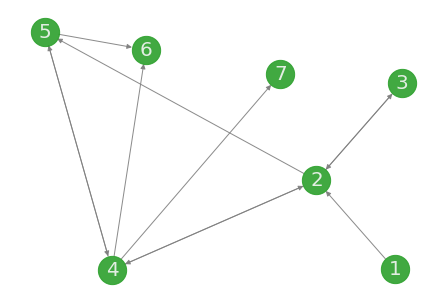

In [65]:
G = nx.DiGraph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,7+1))
G.add_edges_from([(1,2),(2,3),(3,2),(2,4),(2,5),(5,4),(4,5),(4,6),(4,2),(4,7),(5,6)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3, threshold=0.0001, seed=35129314) 
nx.draw(G, pos, with_labels=True, **options)

In [ ]:
def pagerank_prom(G, alpha=0.85):         # Closeness
    N = len(G); s = 0
    p = nx.pagerank(G, alpha=alpha, nstart={1:0.000005, 2:0.000001,3:0.000003,4:0.000002,5:0.000001,6:0.000002,7:0.000001},
                    dangling=None, max_iter=1000)
    for key in p:
        s += p[key]
    return s/N

In [66]:
print("------ PageRank (delta=0.85) ------","\n")
print("Promedio:", pagerank_prom(G, alpha=0.85),"\n")
print("------ PageRank ------")
for delta in np.array([0.0,0.5,0.7,0.9,1]):
    print("Promedio:", pagerank_prom(G, alpha=delta), "( delta=", delta,")")

------ PageRank (delta=0.85) ------ 

Promedio: 0.14285714285714282 

------ PageRank ------
Promedio: 0.14285714285714282 ( delta= 0.0 )
Promedio: 0.14285714285714285 ( delta= 0.5 )
Promedio: 0.14285714285714288 ( delta= 0.7 )
Promedio: 0.14285714285714285 ( delta= 0.9 )
Promedio: 0.14285714285714274 ( delta= 1.0 )


### Histogramas

In [284]:
def hist_centrality(G, alpha_k=0.1, beta_k=1.0, delta_pr=0.85):
    N = len(G); 
    s1, s2, s3 = [], [], [] 
    B1 = nx.eigenvector_centrality(G)
    B2 = nx.katz_centrality_numpy(G, alpha=alpha_k, beta=beta_k, normalized=False)
    B3 = nx.pagerank(G, alpha=delta_pr, nstart={1:0.000005, 2:0.000001,3:0.000003,4:0.000002,5:0.000001,6:0.000002,7:0.000001},
                    dangling=None, max_iter=1000)
    for key in B1:
        s1.append(B1[key])
    s1 = np.array(s1)
    
    for key in B2:
        s2.append(B2[key])
    s2 = np.array(s2)
    
    for key in B3:
        s3.append(B3[key])
    s3 = np.array(s3)
    
    fig, axes = plt.subplots(1,3, figsize=(13, 5), sharey="row", squeeze=True)
#   ---------------------------------------------------------
    sns.histplot(data=s1, ax=axes[0], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[0].title.set_text("Eigenvector centrality")
#   ---------------------------------------------------------
    sns.histplot(data=s2, ax=axes[1], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[1].title.set_text("Katz centrality")
#   ---------------------------------------------------------
    sns.histplot(data=s3, ax=axes[2], y=None, hue=None, stat='count', shrink=1,
                     binwidth=None, binrange=None, discrete=None,
                     cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', color="orange")
    axes[2].title.set_text("PageRank centrality")
    
    fig.tight_layout()
    plt.show()

In [285]:
hist_centrality(G, alpha_k=0.1, beta_k=1.0, delta_pr=0.85)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')

### Datasets: `bio-diseasomeEL.txt`

In [231]:
df1 = pd.read_csv("Datasets/bio-diseasomeEL.txt", sep="\s", header=None, names=["In", "Out"])
# df1.head()

edge_list1 = []                       # extrayendo lista de aristas
for i in range(len(df1)):
    edge_list1.append((df1.to_numpy()[i][0], df1.to_numpy()[i][1]))

C:\Users\Joshu\AppData\Local\Temp\ipykernel_10040\220664543.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df1 = pd.read_csv("Datasets/bio-diseasomeEL.txt", sep="\s", header=None, names=["In", "Out"])


In [276]:
def is_directed(edge_list):
    node_list = np.unique(np.array(edge_list)[:,0:2])
    l_1 = len(edge_list)
    l_2 = len(list(nx.edge_dfs(nx.Graph(edge_list), node_list)))
    if l_1 == l_2:
        return False
    else: 
        return True
# ----------------------------------------------------
def is_weighted(edge_list):
    if len(edge_list[0]) == 2:
        return False
    else: 
        return True
# ----------------------------------------------------
def make_graph(edge_list):
    if is_directed(edge_list) == False:
        if is_weighted(edge_list) == False:
            G = nx.Graph()
        else:
            G = nx.MultiGraph()
    else:
        if is_weighted(edge_list) == False:
            G = nx.DiGraph()
        else:
            G = nx.MultiDiGraph()
    G.add_edges_from(edge_list)
    return G
# ----------------------------------------------------
def is_connected(G):
    cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
    if len(cc)==1:
        s = True
    else: 
        s = False
    return s, cc[0]
# ----------------------------------------------------
def analyse_edges(edge_list):
    dict_E = dict()
    dict_E["Directed"] = is_directed(edge_list)
    dict_E["Weighted"] = is_weighted(edge_list)
    dict_E["Connected"] = is_connected(make_graph(edge_list))[0]
    dict_E["Max. connected components"] = is_connected(make_graph(edge_list))[1]
    
    return dict_E

# ----------------------------------------------------
def analyse_graph(G):
    L = nx.laplacian_matrix(G, weight='weight')
    L_graph = plt.spy(L, markersize=1)
    plt.title("Laplacian matrix")
    
    dict_G = dict()
    dict_G["Degree"]         = grado_prom(G)
    dict_G["Clustering"]     = clustering_prom(G)
    dict_G["Betweenness"]    = betweenness_prom(G)
    dict_G["Shortest-path"]  = shortest_path_length_prom(G)
    dict_G["Diameter"]       = nx.diameter(G)
    dict_G["Closeness"]      = closeness_prom(G)
    dict_G["Eccentricity"]   = eccentricity_prom(G)
    dict_G["Eigen"]      = eigenvalue_prom(G)
    dict_G["Katz"]       = katz_prom(G, alpha=0.1, beta=1.0)
    dict_G["PageRank"]   = pagerank_prom(G, alpha=0.85)
    
    return dict_G

In [274]:
analyse_edges(edge_list1)

{'Directed': False,
 'Weighted': False,
 'Connected': True,
 'Max. connected components': 516}

{'Degree': 4.604651162790698,
 'Clustering': 0.6358304997771195,
 'Betweenness': 1418.565891472869,
 'Shortest-path': 6.5089937532926925,
 'Diameter': 15,
 'Closeness': 0.15937101043257765,
 'Eccentricity': 11.571705426356589,
 'Eigen': 0.015451197248527474,
 'Katz': 1.5556460929930886,
 'PageRank': 0.0019379844961240297}

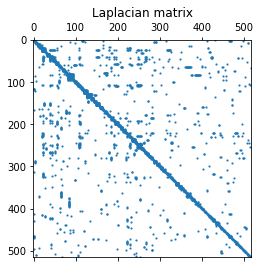

In [278]:
G1 = make_graph(edge_list1)
analyse_graph(G1)

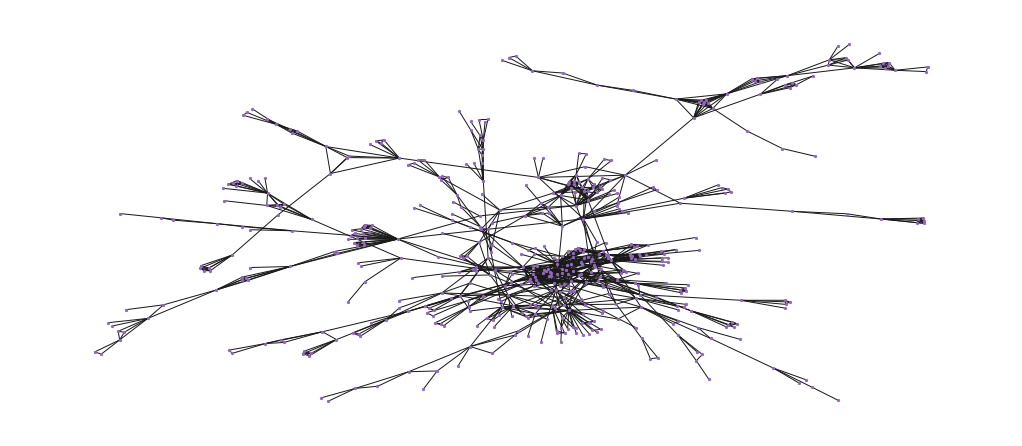

In [279]:
plt.figure(figsize=(14,6))
options2 = {"edge_color": "0.1",  "node_size": 5, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}

nx.draw(G1, **options2)

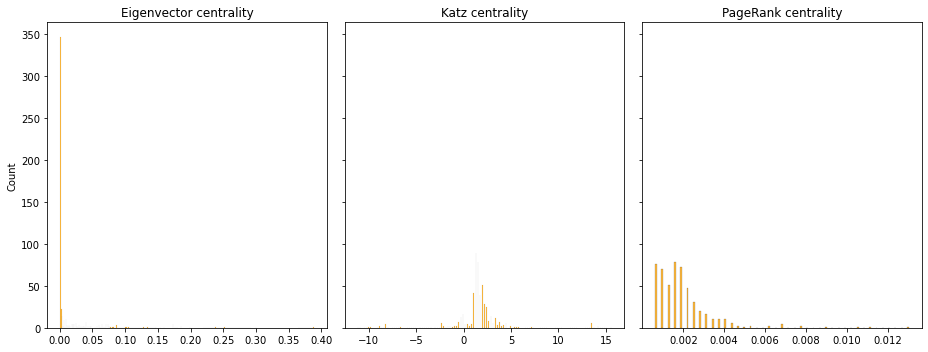

In [283]:
hist_centrality(G1, alpha_k=0.1, beta_k=1.0, delta_pr=0.85)

In [ ]:
G_diseasome = nx.Graph()
G_diseasome.add_edges_from(edge_list1)

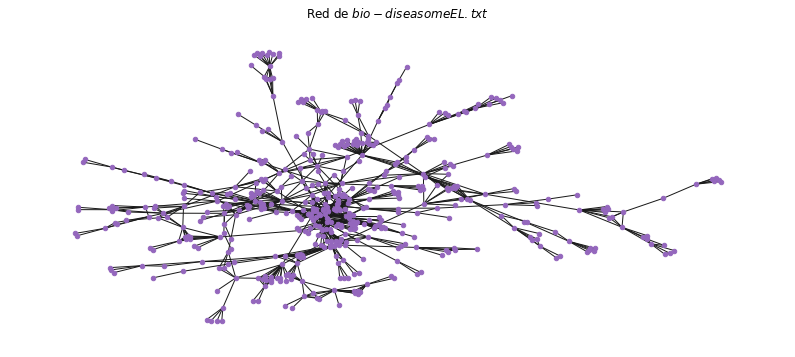

### Datasets: `bio-yeast-protein-inter.edges`

In [181]:
df2 = pd.read_csv("Datasets/bio-yeast-protein-inter.edges", sep="\s", header=None, names=["In", "Out"])
# df2.head()

edge_list2 = []                       # extrayendo lista de aristas
for i in range(len(df2)):
    edge_list2.append((df2.to_numpy()[i][0], df2.to_numpy()[i][1]))
    


C:\Users\Joshu\AppData\Local\Temp\ipykernel_10040\3267845804.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv("Datasets/bio-yeast-protein-inter.edges", sep="\s", header=None, names=["In", "Out"])


In [ ]:
G = nx.Graph()

G.add_edges_from(edge_list2)

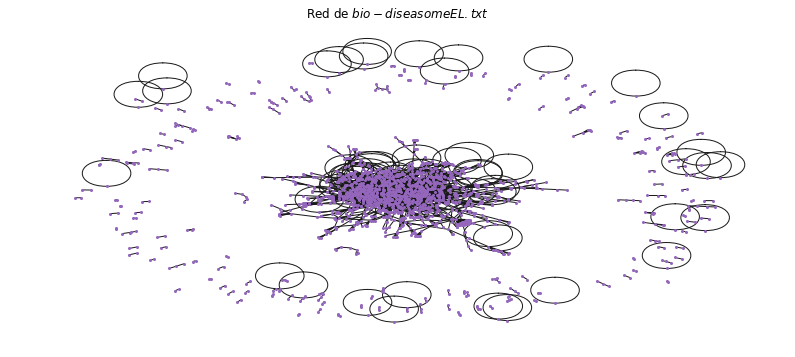

In [184]:
options3 = {"edge_color": "0.1",  "node_size": 4, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}

plt.figure(figsize=(14,6))
plt.title(r"Red de $bio-yeast-protein-inter.edges$")
nx.draw(G, **options3)

### Datasets: `retweet-digraph.edges`

In [ ]:
df3 = pd.read_csv("Datasets/retweet-digraph.edges", sep="\s", header=None, names=["Retweet", "Mention", "Weight"])
# df2.head()

edge_list3 = []                       # extrayendo lista de aristas
for i in range(len(df3)):
    edge_list3.append((df3.to_numpy()[i][0], df3.to_numpy()[i][1], df3.to_numpy()[i][2]))

##  Apéndice

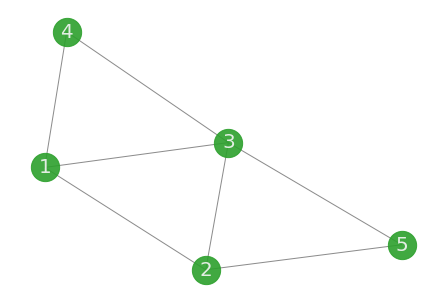

In [10]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size": 20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, k=1, iterations=3000, threshold=0.00001, seed=6229312) 
nx.draw(G, pos, with_labels=True, **options)

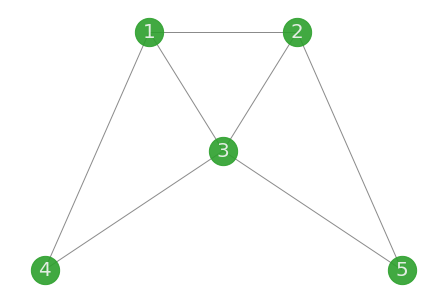

In [11]:
G = nx.Graph()

options = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:green", "font_size":20, "font_color":"whitesmoke"}

# add nodes and edges
G.add_nodes_from(range(1,5+1))
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(2,5),(3,4),(3,5)])

# establish the position with a fixed seed
pos = nx.spring_layout(G, seed=31137942) 
nx.draw_spectral(G, with_labels=True, **options)

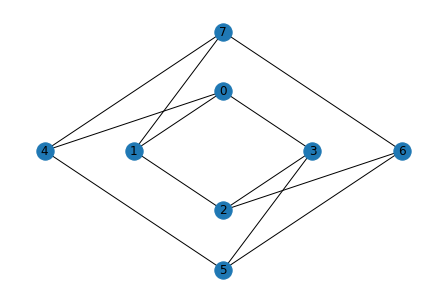

In [12]:
G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794)

nx.draw_shell(G, nlist=[range(4), range(4,8)], with_labels=True)
